# Importando bibliotecas

**Name:**
**Year:**
**Month:**
**Day:**
**Hour:**
**Lat:**
**Long:**
**Status:**
**Category:**
**Wind:**
**Pressure:**
**Tropicalstorm_force_diamete:**
**hurricane_force_diameter:**

# Questões a serem respondidas?

1. Ver quais as tempestades com maior ocorrência? (nome, category, status)
2. Qual a maior velocidade do vento e pressão?
3. Qual a maior ocorrência das tempestades em um período de tempo (dia, mes, ano ) -> Desafio semanas
4. Qual a localidade que sofreu mais tempestades. (independente das variaveis?). Exemplo: A cidade que teve maior frequência de tempestades
5. Em quais localidades as tempestades (por status) ocorreram. Exemplo: Hurricane houve a maior concentração no Alabama, porém a depressão em Michigan e New York
6. Quais as localidade mais afetadas, por um determinado Tempestade. Exemplo: A Carrie ocorreu com maior frequência em New York e Florida.
7. Ano que teve mais tempestades.


## Determinar categorias por tipo de tempestade

> Como podemos determinar as categorias pelos tipos de tempestades.


 ## Importando todas as biblioteca necessárias


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

!pip install geopandas
# Estudar bibliotecas
# FOLIUM => https://jacobtadesse.com/2019/09/28/visualizing-pandas-dataframe-lat-long-with-folium-maps/
# GEOPLOT => https://medium.com/geekculture/geospatial-visualization-with-geoplot-in-python-40b3de35ce0d
from async_generator._tests.conftest import mock_sleep

  Using cached geopandas-0.11.1-py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using 

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\jefer\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jefer\\AppData\\Local\\Temp\\pip-install-djvybqm5\\fiona_41a5bd0d79e947168a18465290c38ed9\\setup.py'"'"'; __file__='"'"'C:\\Users\\jefer\\AppData\\Local\\Temp\\pip-install-djvybqm5\\fiona_41a5bd0d79e947168a18465290c38ed9\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\jefer\AppData\Local\Temp\pip-pip-egg-info-h7jp7w3p'
         cwd: C:\Users\jefer\AppData\Local\Temp\pip-install-djvybqm5\fiona_41a5bd0d79e947168a18465290c38ed9\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERRO

### Carregando os Datasets

> Iremos juntar todos os dados em apenas um único DataFrame
    > O arquivo storms.csv contém tempestades da época de 1950 aos dias atuais
    > Já storms_updated.csv contém dados de 1852 a 1950
Quando já finalizamos a junção dos dados, iremos realizar um sort dos valores por ano, mês e dia

In [53]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms_updated.csv')
df = pd.concat([df1, df2])\
        .sort_values(by=['year', 'month', 'day'], ascending=[True, True, True])\
        .reset_index(drop=True)
df

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,6,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,12,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,12,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,18,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,20,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30011,Wanda,2021,11,6,18,37.1,-38.0,tropical storm,0,35,1002,100.0,0.0
30012,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0
30013,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,0,35,1004,60.0,0.0
30014,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0


In [54]:
df = df.drop(columns=['hour'])

# Tratamento de dados
>O tratamento de dados é algo muito importante, no qual analisamos o nosso dataset por completo, para verificar, se precisaremos realizar tratamentos, como tipo das colunas, valores nulos.


Analisaremos a integridade dos dados, ou seja, inicialmente verificaremos a quantidade de dados nulos.

In [55]:
df.isna().sum()

name                                0
year                                0
month                               0
day                                 0
lat                                 0
long                                0
status                              0
category                            0
wind                                0
pressure                            0
tropicalstorm_force_diameter    17551
hurricane_force_diameter        17551
dtype: int64

Como podemos perceber no código acima `df.isna().sum()`, nos relata a quantidade de dados nulos em cada coluna. Para uma melhor visualização dos dados nulos iremos separalos em outro dataframe

In [56]:
# Filtrando apenas as colunas com valores maiores que 0.
# TODO: Criar texto explicando o por que da analise sobre estas colunas e se há necessidade de tratar.
index_1 = list(df.loc[pd.isna(df.tropicalstorm_force_diameter), :].index)
index_2 = list(df.loc[pd.isna(df.hurricane_force_diameter), :].index)
all_nan_ind = list(set(index_1 + index_2))
len(all_nan_ind)
# half_empty_columns_df
half_empty_columns_df = df.filter(items = all_nan_ind, axis=0)
half_empty_columns_df

,name,year,month,day,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22452,Harvey,2011,8,20,17.0,-88.3,tropical storm,0,55,995,NaN,NaN
22466,Irene,2011,8,21,17.8,-64.6,tropical storm,0,60,993,NaN,NaN
22476,Irene,2011,8,22,18.1,-65.8,tropical storm,0,60,990,NaN,NaN
22487,Irene,2011,8,24,22.4,-74.0,hurricane,3,100,955,NaN,NaN


Quais os tipos de dados das colunas?

In [57]:
df.dtypes

name                             object
year                              int64
month                             int64
day                               int64
lat                             float64
long                            float64
status                           object
category                          int64
wind                              int64
pressure                          int64
tropicalstorm_force_diameter    float64
hurricane_force_diameter        float64
dtype: object

Todos os tipos dados estão corretos para a nossa analise, logo não precisaremos realizar nenhuma conversão. Vamos adicionar uma nova coluna chamada **date** para facilitar a nossa busca por datas.

In [58]:
def format_date_field(row):
        date=datetime(row['year'], row['month'], row['day'])
        row['date'] = pd.to_datetime(date)
        return row

df = df.apply(lambda row: format_date_field(row), axis=1)
df['date']

0       1852-08-26
1       1853-09-03
2       1854-09-07
3       1854-09-08
4       1854-09-08
           ...    
30011   2021-11-06
30012   2021-11-07
30013   2021-11-07
30014   2021-11-07
30015   2021-11-07
Name: date, Length: 30016, dtype: datetime64[ns]

Como podemos ver a coluna **date** é do tipo **datetime**, o que queriamos.
Podemos agora excluir as colunas **year**, **month**, **day**

In [59]:
df[['date', 'year', 'month', 'day']].sample(2)

,date,year,month,day
21411,2009-11-04,2009,11,4
21292,2009-08-27,2009,8,27


Iremos converter a coluna **wind** para km/h, pois está como **knots**

In [60]:
df['wind km/h'] = df['wind'].apply(lambda x: x*1.852)
df.rename(columns={'wind':'wind kn'}, inplace=True)
df[['wind kn','wind km/h']].head()

,wind kn,wind km/h
0,100,185.20
1,130,240.76
2,110,203.72
3,100,185.20
4,100,185.20


# Analisando os dados
Começaremos a analisar os dados e responder as nossas questões

In [61]:
df = df.drop(columns=['year', 'month', 'day'])

# Analise Exploratória

> Inicialmente iremos verificar a maior ocorrência de tempestades.
> **OBS:** É importante ressaltar que não pegaremos todas as tempestades

In [62]:
print(f"O total de tempestades registradas foram {len(df['name'].unique().tolist())}")

O total de tempestades registradas foram 651


Como podemos ver, o total de tempestades registradas é de 651, mas nem todas elas possuem um nome de fato, umas só possuem um código. Vamos demonstrar:

In [63]:
# Filtrando as tempestades (cujo nem todos os caracteres estão no alfabeto)
df_not_real_names = df[~df['name'].str.isalpha()]

# Filtrando as tempestades (cujo todos os caracteres estão no alfabeto)
df_real_names = df[df['name'].str.isalpha()]

# Visualizando estas separações
display(df_real_names['name'][:5],
        df_not_real_names['name'][:5])

602    Able
603    Able
604    Able
605    Able
606    Able
Name: name, dtype: object

0    AL011852
1    AL031853
2    AL031854
3    AL031854
4    AL031854
Name: name, dtype: object

In [64]:
df_real_names.sample(20)

,name,lat,long,status,category,wind kn,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date,wind km/h
28993,Zeta,18.2,-83.0,tropical depression,-1,30,1006,0.0,0.0,2020-10-24,55.56
28087,Cristobal,24.8,-90.2,tropical storm,0,45,992,320.0,0.0,2020-06-06,83.34
23092,Beryl,32.6,-80.6,tropical storm,0,35,1002,100.0,0.0,2012-05-30,64.82
3261,Emmy,22.7,-64.0,tropical storm,0,55,999,NaN,NaN,1976-08-24,101.86
18092,Ivan,26.5,-88.6,tropical depression,-1,30,1008,0.0,0.0,2004-09-22,55.56
6557,Juan,29.4,-92.0,hurricane,1,75,972,NaN,NaN,1985-10-28,138.90
23665,Nadine,30.8,-50.7,hurricane,1,70,980,300.0,40.0,2012-09-15,129.64
21733,Gaston,13.1,-37.2,tropical depression,-1,30,1006,0.0,0.0,2010-09-02,55.56
8446,Arthur,11.1,-60.0,tropical storm,0,40,1004,NaN,NaN,1990-07-25,74.08
4534,Frances,16.6,-35.9,hurricane,2,85,968,NaN,NaN,1980-09-11,157.42


### 1. Visualizando as tempestades com maior ocorrência
> Para visualizar as tempestades com maior ocorrência, iremos realizar outro filtro, baseado na contagem dos valores. E também voltado apenas nas tempestades com nomes reais

C:\Users\jefer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


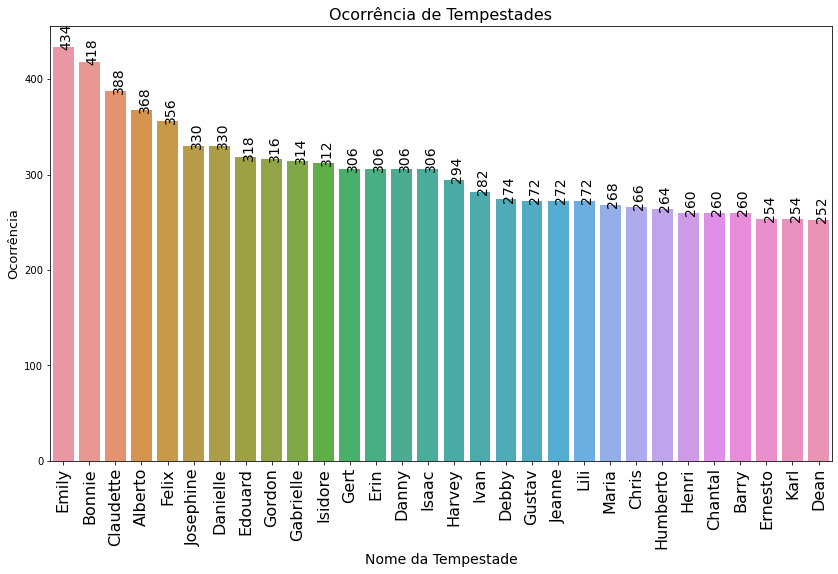

In [65]:
# Filtering date based on "name" and count of each values
most_frequent_storms = df_real_names[df_real_names['name'].isin(
        df_real_names['name'].value_counts()[df_real_names['name'].value_counts()>250].index)]

# Order by clause, to sort the graphic plot
order_by_clause = most_frequent_storms['name'].value_counts().index

fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(most_frequent_storms['name'], order=order_by_clause, ax=ax)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    (p.get_x()+0.25, p.get_height()+0.1),
                    rotation=90,
                    fontsize=14)
plt.title("Ocorrência de Tempestades", fontsize=16)
plt.xlabel("Nome da Tempestade", fontsize=14)
plt.ylabel("Ocorrência", fontsize=13)
plt.xticks(rotation=90, fontsize=16)
plt.show()

**Com a plotagem do gráfico acima, podemos visualizar que as tempestades com maior ocorrência, foram:**

1. Emily (434 ocorrências);
2. Bonnie (418 ocorrências);
3. Claudette (388 ocorrências);
4. Alberto (368 ocorrências);
5. Felix (356 ocorrências).

In [66]:
# df[['status', 'category']].count_values()
df.groupby(by='status')

In [67]:
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

<AxesSubplot:xlabel='category', ylabel='count'>

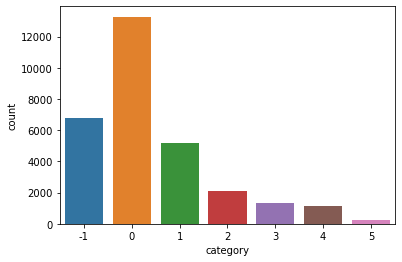

In [68]:
sns.countplot(x='category', data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

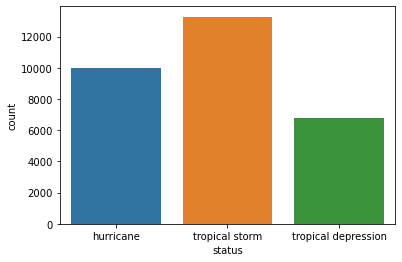

In [69]:
sns.countplot(x='status', data=df)

In [70]:
# Separar por tipo de status
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

In [71]:
# testando teste 123 remover texto fake sqn

# Plotando informações em um gráfico


<AxesSubplot:xlabel='wind km/h', ylabel='count'>

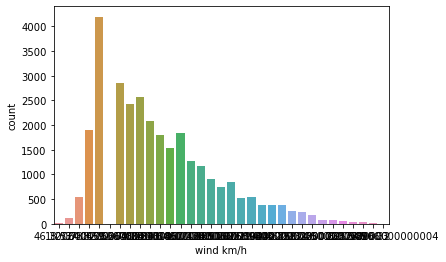

In [72]:
df[df['wind km/h'] == df['wind km/h'].max()]
#df.loc[df['wind km/h'].idxmax()]
sns.countplot(x='wind km/h', data=df)

<AxesSubplot:xlabel='pressure', ylabel='count'>

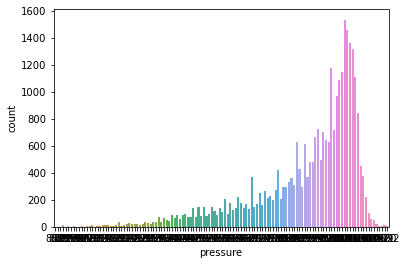

In [73]:
df[df['pressure'] == df['pressure'].max()]
sns.countplot(x='pressure', data=df)

<AxesSubplot:xlabel='count', ylabel='count'>

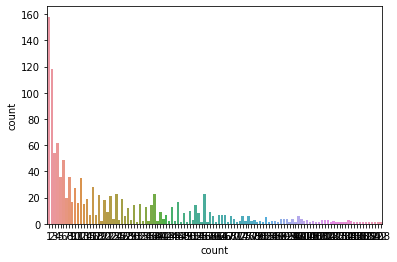

In [74]:
dfWeekYear = df.groupby(df['date'].apply(lambda x: "%d/%d" % (x.week, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 

sns.countplot(x='count', data=dfWeekYear)    

In [75]:
df.groupby(df['date'].apply(lambda x: "%d/%d" % (x.month, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

,date,count
514,9/2004,507
380,8/1995,498
530,9/2020,456
508,9/1998,406
520,9/2010,392


In [76]:
df.groupby(df['date'].apply(lambda x: "%d/%d/%d" % (x.day, x.month, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

,date,count
824,14/9/2020,40
2559,25/9/1998,34
3292,3/9/2008,34
2789,27/8/1995,34
2284,23/9/2004,32


In [77]:
df.groupby(df['date'].apply(lambda x: "%d" % (x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

#  df.groupby(df["date"].dt.year).size() \
#  .reset_index(name='count') \
#  .sort_values(['count'], ascending=False) \
#  .head(5)

,date,count
127,1995,1304
152,2020,1215
137,2005,1175
144,2012,932
136,2004,896


# Plotando informações em um Mapa


In [78]:
!pip install folium
!pip install folium pandas
# !pip install cartopy
# !pip install geoplot

In [79]:
# Inicialmente criaremos uma função simples para retornar o mapa de heatmap, já para visualização.
import folium
from folium import plugins
def plot_folium_heatmap_map(df:pd.DataFrame,
                            zoom_start:int = 3,
                            radius:int = 25):
    """
    Create a Heatmap visualization for the Dataframe already filtered
    :param df: DataFrame filtered with the data to plot
    :param radius: (int)
    :param zoom_start: (int) innitial zoom value to the map visualization
    :return: The heatmap visualization
    """
    lat = df['lat'].mean()
    long = df['long'].mean()
    localization = df[['lat', 'long']].values

    map = folium.Map([lat, long],tiles='StamenToner', zoom_start=zoom_start)
    folium.plugins.HeatMap(localization, radius=radius).add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
    folium.LayerControl().add_to(map)
    # map.add_child(plugins.HeatMap(localization, radius=radius))
    return map

In [80]:
map_real_names = plot_folium_heatmap_map(df_real_names,zoom_start = 4)
map_real_names

### Vamos plotar o ano em que tivemos mais tempestades

> Para isso vamos verificar qual a maior frequência absoluta do ano.


In [81]:
# Podemos visualizar o ano mais frequente de uma maneira bem simples.
print(f"O ano mais frequente encontrado no dataset foi: {most_frequent_storms.date.dt.year.mode()[0]}")

O ano mais frequente encontrado no dataset foi: 2004


In [82]:
most_frequent_year = most_frequent_storms.loc[most_frequent_storms.date.dt.year == 2004]
plot_folium_heatmap_map(most_frequent_year, radius=15)

In [83]:
# # display(most_frequent_storms)
# most_frequent_stor_by_name = most_frequent_storms.loc[most_frequent_storms.name == 'Emily']
# plot_folium_heatmap_map(most_frequent_stor_by_name, radius=15)

In [88]:
storms_grouped_status = most_frequent_storms.groupby('status')
lat = most_frequent_storms.lat.mean()
long = most_frequent_storms.long.mean()
map_status = folium.Map(location=[lat,long], zoom_start=5,
                  tiles='Stamen Terrain')
status_grouped_keys = storms_grouped_status.groups.keys()
for status_key in status_grouped_keys:
    status_df = storms_grouped_status.get_group(status_key)
    feature_group = folium.FeatureGroup(status_key)
    # for row in status_df.itertuples():
        # folium.Marker(location=[row.lat, row.long]).add_to(feature_group)
    feature_group.add_to(map_status)
# for grp_name, df_grp in storms_grouped_status.groupby('Group'):

folium.LayerControl().add_to(map_status)
map_status

In [98]:
storms_grouped_status = most_frequent_storms.groupby('status')
lat = most_frequent_storms.lat.mean()
long = most_frequent_storms.long.mean()
heatmap_status = folium.Map([lat, long],tiles='Stamen Terrain', zoom_start=5)
status_grouped_keys = storms_grouped_status.groups.keys()
for status_key in status_grouped_keys:
    status_df = storms_grouped_status.get_group(status_key)
    localization = status_df[['lat', 'long']].values
    folium.plugins.HeatMap(localization, radius=15).add_to(folium.FeatureGroup(name=status_key).add_to(heatmap_status))
folium.LayerControl().add_to(heatmap_status)
heatmap_status